# 任务1：自定义函数实现k-means聚类

- 补全完整的K-Means算法代码
- 在数据集data.csv上评价 K-Means 算法的聚类结果
- 绘出质心与所属样本

> 待补全代码

最终质心：
[[ 2.63711921  3.06283895]
 [-2.4429474   2.79575765]
 [-3.50360111 -2.93524711]
 [ 2.65664152 -2.83520929]]
点所属簇的标签：
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2.]]


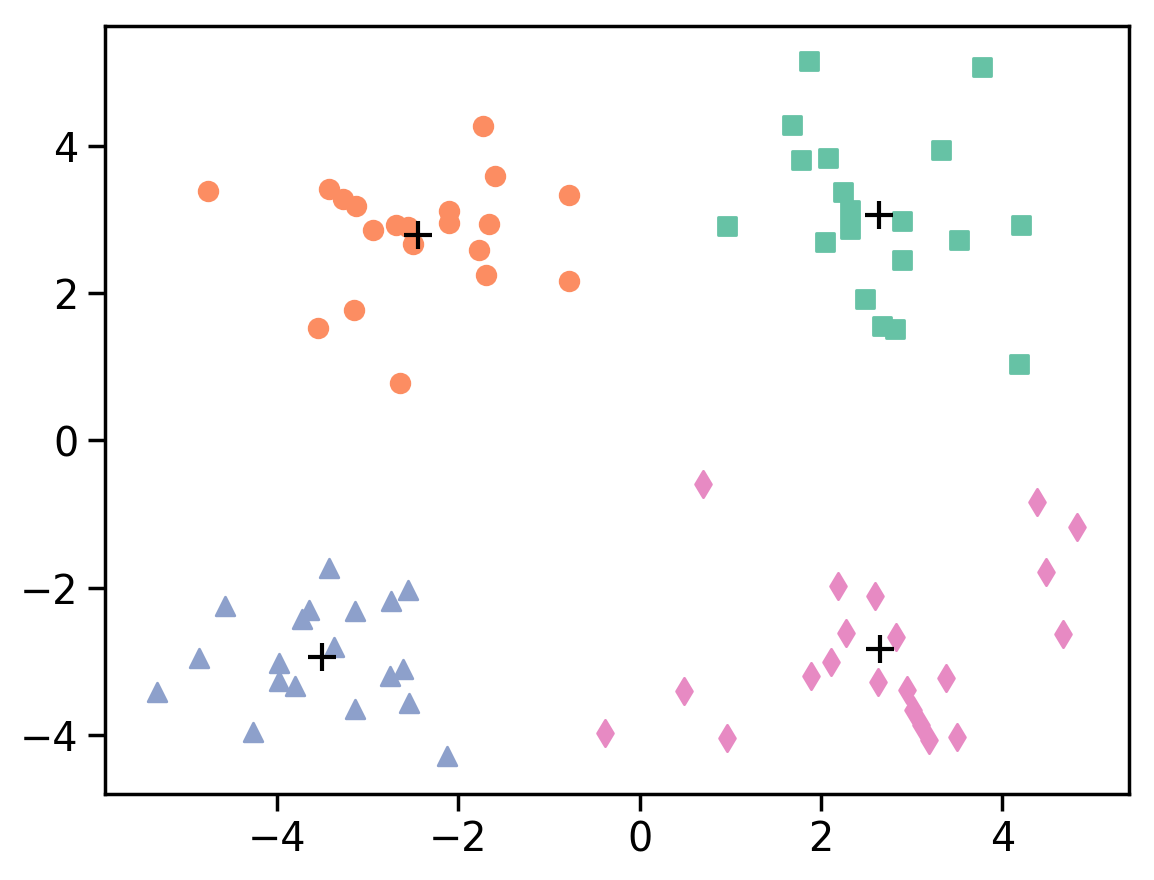

In [1]:
import numpy as np

#欧式距离计算函数
def distEuclidean(vecA, vecB):
    # return np.linalg.norm(vecA - vecB)
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))
    # return ______________________

#随机初始化质心选择函数
def randCent(dataArr, k):
    n = np.shape(dataArr)[1] #获取dataArr的列，即数据维数
    centroids = np.mat(np.zeros((k, n))) #创建初始的质心矩阵
    for i in range(n):
        min_ = np.min(dataArr.values[:,i])
        max_ = np.max(dataArr.values[:,i])
        range_ = float(max_ - min_)
        np.random.seed(12345) #设置种子
        centroids[:,i] = min_ + range_ * np.random.rand(k, 1)
        # random.rand(行，列)值为[0,1)的矩阵
    return centroids

#kMeans函数
def kMeans(dataArr, k):
    m = dataArr.shape[0] # 获取行数
    clusterAssignment = np.mat(np.zeros((m, 2))) # 创建存储簇分配结果的矩阵
    clusterChanged = True # 簇分配结果改变标志
    centroids = randCent(dataArr, k) #创建初始质心
    # print(centroids)
    while clusterChanged:
        clusterChanged = False

        # 1. 遍历每个数据点，计算其与各簇中心的距离，以最近簇作为分配结果
        # 2. 重新计算各簇的中心
        
        # 1. 遍历每个数据点，计算其与各簇中心的距离，以最近簇作为分配结果
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distEuclidean(np.array(dataArr.iloc[i]), np.array(centroids[j, :]))
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssignment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssignment[i, :] = minIndex, minDist ** 2
        # 2. 重新计算各簇的中心
        for cent in range(k):
            ptsInCluster = dataArr.iloc[np.nonzero(clusterAssignment[:, 0].A == cent)[0]]
            centroids[cent, :] = np.mean(ptsInCluster, axis=0)

    return centroids, clusterAssignment

#画图函数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn包
sns.set_context("notebook",font_scale=1.3) # notebook格式，放大横纵坐标标记
sns.set_palette('Set2') # 配色使用Set2  
data = pd.read_csv('data.csv')
data = data.iloc[:,0:2]
#print(data)
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # retina高清显示
def plotResult(data, k):
    np.random.seed(6)
    centroids,clusterAssment = kMeans(data, k)
    print("最终质心：")
    print(centroids)
    print("点所属簇的标签：")
    print(clusterAssment[:, 0].T)
    rect=[0.1, 0.1, 0.8, 0.8]
    fig = plt.figure()
    markers = ['s', 'o', '^', 'd']
    ax = fig.add_axes(rect)
    for cent in range(4):
        # 簇内数据矩阵和簇中心
        ptsInCluster = data.values[np.nonzero(clusterAssment[:, 0].A==cent)[0]]
        ax.scatter(ptsInCluster[:, 0], 
                   ptsInCluster[:, 1],
                   marker=markers[cent],
                   s=45)

    ax.scatter(centroids[:, 0].flatten().A[0], 
               centroids[:, 1].flatten().A[0], 
               marker='+',
               s=100,
               c='k')

#画图
plotResult(data, 4)

# 任务2: 调用sklearn中的kMeans

- 调用sklearn中提供的kMeans算法
- 在数据集data.csv上评价 K-Means 算法的聚类结果
- 绘出质心与所属样本
- 对比分析与自己实验的kmeans聚类的实验结果的差异

> 待补全代码

最终质心：
[[ 2.808842   -2.77818185]
 [-2.4429474   2.79575765]
 [-3.34778945 -2.98727265]
 [ 2.63711921  3.06283895]]
点所属簇的标签：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


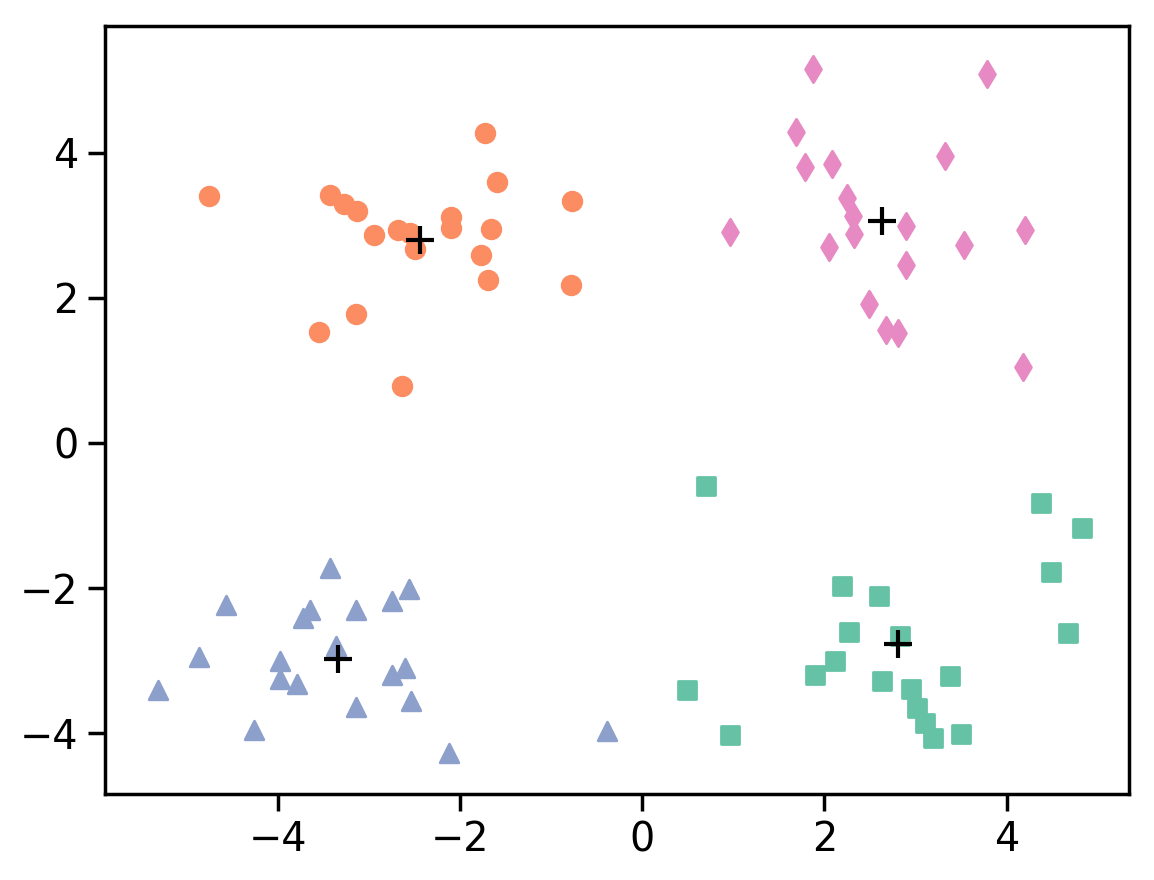

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn包

# #调用sklearn中KMeans函数
# kmeans_ = ______________________
# #模型训练
# ______________________

# 调用sklearn中KMeans函数
kmeans_ = KMeans(n_clusters=4, random_state=12345)
# 模型训练
kmeans_.fit(data)

# 画图
sns.set_context("notebook",font_scale=1.3) # notebook格式，放大横纵坐标标记
sns.set_palette('Set2') # 配色使用Set2  
data = pd.read_csv('data.csv')
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # retina高清显示
def plotResult(data, k):
    np.random.seed(6)
    centroids = kmeans_.cluster_centers_
    clusterAssment = kmeans_.labels_
    print("最终质心：")
    print(centroids)
    print("点所属簇的标签：")
    print(clusterAssment)
    rect=[0.1, 0.1, 0.8, 0.8]
    fig = plt.figure()
    markers = ['s', 'o', '^', 'd']
    ax = fig.add_axes(rect)
    for cent in range(4):
        # 簇内数据矩阵和簇中心
        ptsInCluster = data.values[np.nonzero(clusterAssment==cent)[0]]
        ax.scatter(ptsInCluster[:, 0], 
                   ptsInCluster[:, 1],
                   marker=markers[cent],
                   s=45)

    ax.scatter(centroids[:, 0].flatten(), 
               centroids[:, 1].flatten(), 
               marker='+',
               s=100,
               c='k')

#画图
plotResult(data, 4)